<a href="https://colab.research.google.com/github/Aje-dotcom/100-nlp-papers/blob/master/03_Reporting_in_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporting in Pandas

## Aggregating statistics grouped by category

groupby() and pivot_table() are very powerful in analysing and summarizing the data. It is very useful when applying complex aggregation.

In [1]:
#reading the online stores data

import numpy as np
import pandas as pd

#df = pd.read_csv('Data/online_store_sales.csv', parse_dates = ['Order Date', 'Ship Date'], dayfirst=True)


#an alternative to data import
import requests
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1MeGSyI1BvsRfQmzn2sfZVKiiGVStP-IM/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd, parse_dates = ['Order Date', 'Ship Date'], dayfirst=True)


df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


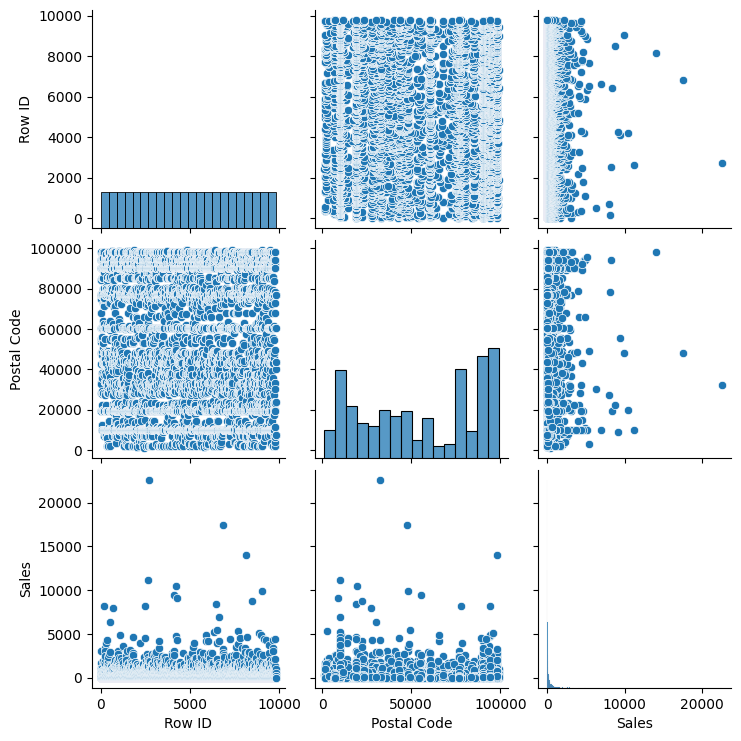

In [2]:
# prompt: Using dataframe df: pairplot

import seaborn as sns
sns.pairplot(df)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [4]:
col_names = [col.strip().lower().replace(' ', '_').replace('-', '_') for col in df.columns]

df.columns = col_names

df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales'],
      dtype='object')

### Grouping the data on the basis of product category

In [5]:
grouped_df = df.groupby('category')
grouped_df

### To return all the groups and row indexes

The `groups` attribute is a dictionary whose keys are the unique groups in the data. The corresponing values are the axis labels (i.e, row numbers) belonging to each group.

In [ ]:
## this is what it looks like

grouped_df.groups

{'Furniture': [0, 1, 3, 5, 10, 23, 24, 27, 29, 36, 38, 39, 51, 52, 57, 65, 66, 72, 73, 76, 78, 85, 93, 96, 104, 110, 117, 119, 124, 125, 128, 129, 139, 140, 146, 149, 157, 167, 173, 177, 189, 192, 201, 204, 213, 222, 226, 228, 229, 231, 232, 234, 238, 239, 241, 242, 244, 249, 254, 272, 282, 292, 293, 294, 295, 301, 303, 304, 309, 310, 311, 313, 317, 325, 328, 338, 354, 362, 364, 369, 377, 384, 387, 399, 408, 412, 413, 415, 417, 422, 424, 425, 439, 440, 444, 446, 453, 456, 457, 462, ...], 'Office Supplies': [2, 4, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 25, 28, 30, 31, 32, 33, 34, 37, 42, 43, 45, 46, 49, 50, 53, 55, 56, 58, 60, 61, 63, 64, 67, 69, 70, 71, 74, 75, 77, 79, 80, 81, 82, 83, 84, 87, 88, 89, 91, 92, 94, 95, 97, 98, 99, 101, 102, 105, 108, 111, 112, 113, 114, 115, 116, 118, 120, 121, 122, 126, 127, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 150, 151, 153, 154, 155, 156, 158, 160, 162, 163, 164, ...], 'Technology': [7, 11, 19, 26, 35, 40, 41, 44, 

In [ ]:
## To get unique group keys

grouped_df.groups.keys()

dict_keys(['Furniture', 'Office Supplies', 'Technology'])

In [ ]:
## Filtering data on the basis of group keys

grouped_df.get_group('Furniture')

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,9787,US-2015-114377,2015-11-05,2015-11-05,Same Day,BG-11035,Barry Gonzalez,Consumer,United States,Hampton,Virginia,23666.0,South,FUR-CH-10004754,Furniture,Chairs,"Global Stack Chair with Arms, Black",149.9000
9787,9788,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320
9788,9789,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.5580
9790,9791,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.2460


### Returning the first row, last row, nth for each group

In [ ]:
#first row

grouped_df.first()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,sub_category,product_name,sales
category,,,,,,,,,,,,,,,,,
Furniture,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.960
Office Supplies,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
Technology,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Phones,Mitel 5320 IP Phone VoIP phone,907.152


In [ ]:
# last row

grouped_df.last()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,sub_category,product_name,sales
category,,,,,,,,,,,,,,,,,
Furniture,9793,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10003396,Chairs,Global Deluxe Steno Chair,107.772
Office Supplies,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
Technology,9800,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [ ]:
#return nth row

grouped_df.nth(19)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
32,33,US-2016-150630,2016-09-17,2016-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.858
76,77,US-2018-118038,2018-12-09,2018-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,Texas,77041.0,Central,FUR-FU-10000260,Furniture,Furnishings,"6"" Cubicle Wall Clock, Black",9.708
107,108,CA-2018-119004,2018-11-23,2018-11-28,Standard Class,JM-15250,Janet Martin,Consumer,United States,Charlotte,North Carolina,28205.0,South,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,27.992


### Grouping the data based on product category and sub-category

In [ ]:
# grouping based on category first and then sub-category

grouped_df = df.groupby(['category', 'sub_category'])
grouped_df

In [ ]:
#returning each group and row ids associated to the group

grouped_df.groups

{('Furniture', 'Bookcases'): [0, 27, 38, 189, 192, 213, 292, 354, 369, 399, 412, 468, 472, 485, 688, 708, 736, 783, 841, 906, 954, 1042, 1114, 1211, 1247, 1302, 1369, 1386, 1534, 1539, 1545, 1594, 1610, 1714, 1723, 1760, 1762, 1860, 1875, 1932, 2007, 2025, 2115, 2122, 2225, 2262, 2281, 2305, 2326, 2353, 2403, 2415, 2471, 2543, 2546, 2558, 2603, 2650, 2654, 2737, 2777, 2796, 2808, 2825, 2860, 3023, 3030, 3074, 3098, 3100, 3102, 3175, 3351, 3365, 3368, 3466, 3507, 3512, 3762, 3820, 3845, 3910, 3928, 3985, 3994, 3999, 4023, 4071, 4088, 4110, 4184, 4217, 4223, 4266, 4284, 4383, 4385, 4389, 4423, 4453, ...], ('Furniture', 'Chairs'): [1, 23, 39, 52, 57, 66, 72, 85, 124, 128, 149, 157, 167, 173, 177, 228, 229, 244, 249, 294, 310, 317, 328, 362, 413, 415, 417, 424, 439, 444, 456, 457, 498, 502, 526, 531, 539, 551, 569, 586, 622, 635, 657, 730, 769, 777, 787, 791, 799, 819, 829, 847, 880, 916, 960, 980, 983, 990, 1021, 1030, 1045, 1060, 1067, 1081, 1126, 1158, 1177, 1190, 1198, 1200, 1202, 1212

In [ ]:
#getting the unique groups

grouped_df.groups.keys()

dict_keys([('Furniture', 'Bookcases'), ('Furniture', 'Chairs'), ('Furniture', 'Furnishings'), ('Furniture', 'Tables'), ('Office Supplies', 'Appliances'), ('Office Supplies', 'Art'), ('Office Supplies', 'Binders'), ('Office Supplies', 'Envelopes'), ('Office Supplies', 'Fasteners'), ('Office Supplies', 'Labels'), ('Office Supplies', 'Paper'), ('Office Supplies', 'Storage'), ('Office Supplies', 'Supplies'), ('Technology', 'Accessories'), ('Technology', 'Copiers'), ('Technology', 'Machines'), ('Technology', 'Phones')])

In [ ]:
#filter data on the basis of group keys

grouped_df.get_group(('Technology', 'Phones'))

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152
11,12,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424
19,20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480
35,36,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544
40,41,CA-2016-117415,2016-12-27,2016-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041.0,Central,TEC-PH-10000486,Technology,Phones,Plantronics HL10 Handset Lifter,371.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,9765,CA-2015-123855,2015-06-18,2015-06-23,Standard Class,MC-18100,Mick Crebagga,Consumer,United States,Los Angeles,California,90036.0,West,TEC-PH-10000215,Technology,Phones,Plantronics Cordless Phone Headset with In-lin...,139.800
9773,9774,CA-2017-160234,2017-06-26,2017-07-03,Standard Class,PF-19225,Phillip Flathmann,Consumer,United States,Atlanta,Georgia,30318.0,South,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,135.950
9780,9781,CA-2017-153178,2017-09-14,2017-09-18,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Long Beach,New York,11561.0,East,TEC-PH-10001944,Technology,Phones,Wi-Ex zBoost YX540 Cellular Phone Signal Booster,437.850
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188


In [ ]:
grouped_df.first()

row_id        order_id order_date  ship_date  \
category        sub_category                                                 
Furniture       Bookcases          1  CA-2017-152156 2017-11-08 2017-11-11   
                Chairs             2  CA-2017-152156 2017-11-08 2017-11-11   
                Furnishings        6  CA-2015-115812 2015-06-09 2015-06-14   
                Tables             4  US-2016-108966 2016-10-11 2016-10-18   
Office Supplies Appliances        10  CA-2015-115812 2015-06-09 2015-06-14   
                Art                7  CA-2015-115812 2015-06-09 2015-06-14   
                Binders            9  CA-2015-115812 2015-06-09 2015-06-14   
                Envelopes         31  US-2016-150630 2016-09-17 2016-09-21   
                Fasteners         54  CA-2017-105816 2017-12-11 2017-12-17   
                Labels             3  CA-2017-138688 2017-06-12 2017-06-16   
                Paper             13  CA-2018-114412 2018-04-15 2018-04-20   
                Storage            5  US-2016-108966 2016-10-11 2016-10-18   
                Supplies         139  CA-2017-145583 2017-10-13 2017-10-19   
Technology      Accessories       27  CA-2017-121755 2017-01-16 2017-01-20   
                Copiers          336  CA-2016-137946 2016-09-01 2016-09-04   
                Machines         166  CA-2015-139892 2015-09-08 2015-09-12   
                Phones             8  CA-2015-115812 2015-06-09 2015-06-14   

                                   ship_mode customer_id    customer_name  \
category        sub_category                                                
Furniture       Bookcases       Second Class    CG-12520      Claire Gute   
                Chairs          Second Class    CG-12520      Claire Gute   
                Furnishings   Standard Class    BH-11710  Brosina Hoffman   
                Tables        Standard Class    SO-20335   Sean O'Donnell   
Office Supplies Appliances    Standard Class    BH-11710  Brosina Hoffman   
                Art           Standard Class    BH-11710  Brosina Hoffman   
                Binders       Standard Class    BH-11710  Brosina Hoffman   
                Envelopes     Standard Class    TB-21520  Tracy Blumstein   
                Fasteners     Standard Class    JM-15265   Janet Molinari   
                Labels          Second Class    DV-13045  Darrin Van Huff   
                Paper         Standard Class    AA-10480     Andrew Allen   
                Storage       Standard Class    SO-20335   Sean O'Donnell   
                Supplies      Standard Class    LC-16885   Lena Creighton   
Technology      Accessories     Second Class    EH-13945    Eric Hoffmann   
                Copiers         Second Class    DB-13615    Doug Bickford   
                Machines      Standard Class    BM-11140     Becky Martin   
                Phones        Standard Class    BH-11710  Brosina Hoffman   

                                segment        country             city  \
category        sub_category                                              
Furniture       Bookcases      Consumer  United States        Henderson   
                Chairs         Consumer  United States        Henderson   
                Furnishings    Consumer  United States      Los Angeles   
                Tables         Consumer  United States  Fort Lauderdale   
Office Supplies Appliances     Consumer  United States      Los Angeles   
                Art            Consumer  United States      Los Angeles   
                Binders        Consumer  United States      Los Angeles   
                Envelopes      Consumer  United States     Philadelphia   
                Fasteners     Corporate  United States    New York City   
                Labels        Corporate  United States      Los Angeles   
                Paper          Consumer  United States          Concord   
                Storage        Consumer  United States  Fort Lauderdale   
                Supplies       Co

In [ ]:
grouped_df.last()

row_id        order_id order_date  ship_date  \
category        sub_category                                                 
Furniture       Bookcases       9788  CA-2018-144491 2018-03-27 2018-04-01   
                Chairs          9793  CA-2015-127166 2015-05-21 2015-05-23   
                Furnishings     9785  CA-2016-149748 2016-05-31 2016-06-02   
                Tables          9757  CA-2018-113705 2018-03-27 2018-03-29   
Office Supplies Appliances      9780  CA-2015-169019 2015-07-26 2015-07-30   
                Art             9797  CA-2016-128608 2016-01-12 2016-01-17   
                Binders         9796  CA-2017-125920 2017-05-21 2017-05-28   
                Envelopes       9792  CA-2015-127166 2015-05-21 2015-05-23   
                Fasteners       9702  CA-2017-105291 2017-10-30 2017-11-04   
                Labels          9754  CA-2018-113705 2018-03-27 2018-03-29   
                Paper           9794  CA-2015-127166 2015-05-21 2015-05-23   
                Storage         9784  CA-2016-149748 2016-05-31 2016-06-02   
                Supplies        9764  CA-2015-121762 2015-02-14 2015-02-18   
Technology      Accessories     9800  CA-2016-128608 2016-01-12 2016-01-17   
                Copiers         9618  CA-2018-160633 2018-11-16 2018-11-21   
                Machines        9577  CA-2016-143147 2016-05-26 2016-05-28   
                Phones          9799  CA-2016-128608 2016-01-12 2016-01-17   

                                   ship_mode customer_id        customer_name  \
category        sub_category                                                    
Furniture       Bookcases     Standard Class    CJ-12010      Caroline Jumper   
                Chairs          Second Class    KH-16360     Katherine Hughes   
                Furnishings     Second Class    EM-13825    Elizabeth Moffitt   
                Tables          Second Class    LC-16870        Lena Cacioppo   
Office Supplies Appliances    Standard Class    LF-17185          Luke Foster   
                Art           Standard Class    CS-12490     Cindy Schnelling   
                Binders       Standard Class    SH-19975        Sally Hughsby   
                Envelopes       Second Class    KH-16360     Katherine Hughes   
                Fasteners     Standard Class    SP-20920         Susan Pistek   
                Labels          Second Class    LC-16870        Lena Cacioppo   
                Paper           Second Class    KH-16360     Katherine Hughes   
                Storage         Second Class    EM-13825    Elizabeth Moffitt   
                Supplies      Standard Class    ML-17395  Marina Lichtenstein   
Technology      Accessories   Standard Class    CS-12490     Cindy Schnelling   
                Copiers       Standard Class    BS-11380         Bill Stewart   
                Machines        Second Class    PS-18760         Pamela Stobb   
                Phones        Standard Class    CS-12490     Cindy Schnelling   

                                segment        country             city  \
category        sub_category                                              
Furniture       Bookcases      Consumer  United States          Houston   
                Chairs         Consumer  United States          Houston   
                Furnishings   Corporate  United States         Paterson   
                Tables         Consumer  United States         Richmond   
Office Supplies Appliances     Consumer  United States      San Antonio   
                Art           Corporate  United States           Toledo   
                Binders       Corporate  United States          Chicago   
                Envelopes      Consumer  United States          Houston   
                Fasteners      Consumer  United States  San Luis Obispo   
                Labels         Consumer  United States         Richmond   
                Paper          Consumer  United States          Houston   
                Storage       Co

In [ ]:
grouped_df.nth(15)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
95,96,US-2018-109484,2018-11-06,2018-11-12,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,Oregon,97206.0,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.682
140,141,CA-2017-110366,2017-09-05,2017-09-07,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",82.800
143,144,CA-2018-106180,2018-09-18,2018-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,94122.0,West,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,143.700
152,153,CA-2017-158834,2017-03-13,2017-03-16,First Class,TW-21025,Tamara Willingham,Home Office,United States,Scottsdale,Arizona,85254.0,West,TEC-PH-10001254,Technology,Phones,Jabra BIZ 2300 Duo QD Duo Corded Headset,203.184
155,156,CA-2016-124919,2016-05-31,2016-06-02,First Class,SP-20650,Stephanie Phelps,Corporate,United States,San Jose,California,95123.0,West,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,80.880
168,169,CA-2015-139892,2015-09-08,2015-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-AR-10002656,Office Supplies,Art,Sanford Liquid Accent Highlighters,32.064
216,217,CA-2016-146262,2016-01-02,2016-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256.0,East,TEC-AC-10000109,Technology,Accessories,Sony Micro Vault Click 16 GB USB 2.0 Flash Drive,89.584
228,229,US-2016-145436,2016-02-28,2016-03-04,Standard Class,VD-21670,Valerie Dominguez,Consumer,United States,Columbia,Tennessee,38401.0,South,FUR-CH-10004860,Furniture,Chairs,Global Low Back Tilter Chair,161.568
359,360,CA-2018-155698,2018-03-08,2018-03-11,First Class,VB-21745,Victoria Brennan,Corporate,United States,Columbus,Georgia,31907.0,South,OFF-AP-10001124,Office Supplies,Appliances,Belkin 8 Outlet SurgeMaster II Gold Surge Prot...,647.840
408,409,CA-2018-117457,2018-12-08,2018-12-12,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Francisco,California,94110.0,West,FUR-TA-10002041,Furniture,Tables,"Bevis Round Conference Table Top, X-Base",1004.024


## Split-apply-combine operation

The groupby method is used to support this kind of operation.

**1. Split**
The data is split into groups.

**2. Apply**

A function to be applied to each group independently. Here, you would usually do of the following:

- Aggregation: computes a summary statistic for each group. E.g, group sums or means
    
- Filtration: discard some groups, according to a group-wise computation that evaluates to True or False.
    
- Transformation: perform some group-specific computations and returns a like-indexed object. E.g:
  - Standardize data (z-score) within a group
  - Filling NAs within groups within groups with a value derived from each group

**3. Combine** the results into a data sctructure

### Aggregation

There are several built-in aggregation methods that can be used along with group by.

`any()`: Compute whether any of the values in the groups are truthy


`all()`: Compute whether all the values in the groups are truthy


`idx.max()`: Compute the index of the maximum value in each group


`idx.min()`: Compute the index of the minimum value in each group

Etc.....

In [ ]:
grouped_df = df.groupby('category')

In [ ]:
grouped_df['category'].count()

category
Furniture          2078
Office Supplies    5909
Technology         1813
Name: category, dtype: int64

In [ ]:
grouped_df['sales'].mean()

category
Furniture          350.653790
Office Supplies    119.381001
Technology         456.401474
Name: sales, dtype: float64

In [ ]:
grouped_df = df.groupby(['category', 'sub_category'])

In [ ]:
grouped_df['sub_category'].count()

category         sub_category
Furniture        Bookcases        226
                 Chairs           607
                 Furnishings      931
                 Tables           314
Office Supplies  Appliances       459
                 Art              785
                 Binders         1492
                 Envelopes        248
                 Fasteners        214
                 Labels           357
                 Paper           1338
                 Storage          832
                 Supplies         184
Technology       Accessories      756
                 Copiers           66
                 Machines         115
                 Phones           876
Name: sub_category, dtype: int64

In [ ]:
grouped_df['sales'].mean()

category         sub_category
Furniture        Bookcases        503.598224
                 Chairs           531.833165
                 Furnishings       95.823865
                 Tables           645.893720
Office Supplies  Appliances       227.926804
                 Art               34.019631
                 Binders          134.067550
                 Envelopes         65.032444
                 Fasteners         14.027850
                 Labels            34.587468
                 Paper             57.420257
                 Storage          263.633885
                 Supplies         252.284283
Technology       Accessories      217.178175
                 Copiers         2215.880212
                 Machines        1645.553313
                 Phones           374.180877
Name: sales, dtype: float64

In [ ]:
grouped_df['sales'].idxmax()

category         sub_category
Furniture        Bookcases       9741
                 Chairs          7243
                 Furnishings     7387
                 Tables          9639
Office Supplies  Appliances      7579
                 Art               67
                 Binders         9039
                 Envelopes       2516
                 Fasteners       8006
                 Labels          1621
                 Paper           3262
                 Storage         3070
                 Supplies        2505
Technology       Accessories      251
                 Copiers         6826
                 Machines        2697
                 Phones          2492
Name: sales, dtype: int64

In [ ]:
df.loc[7243]

row_id                                                   7244
order_id                                       CA-2018-118892
order_date                                2018-08-17 00:00:00
ship_date                                 2018-08-22 00:00:00
ship_mode                                        Second Class
customer_id                                          TP-21415
customer_name                                    Tom Prescott
segment                                              Consumer
country                                         United States
city                                             Philadelphia
state                                            Pennsylvania
postal_code                                           19134.0
region                                                   East
product_id                                    FUR-CH-10002024
category                                            Furniture
sub_category                                           Chairs
product_

In [ ]:
df.loc[2492]

row_id                          2493
order_id              CA-2015-144624
order_date       2015-11-19 00:00:00
ship_date        2015-11-23 00:00:00
ship_mode             Standard Class
customer_id                 JM-15865
customer_name            John Murray
segment                     Consumer
country                United States
city                       Jamestown
state                       New York
postal_code                  14701.0
region                          East
product_id           TEC-PH-10002885
category                  Technology
sub_category                  Phones
product_name          Apple iPhone 5
sales                        4548.81
Name: 2492, dtype: object

### Aggregation with user-defined functions

In [ ]:
grouped_df['sales'].agg(['min', 'max', 'mean'])

min        max         mean
category        sub_category                                 
Furniture       Bookcases      35.490   4404.900   503.598224
                Chairs         26.640   4416.174   531.833165
                Furnishings     1.892   1336.440    95.823865
                Tables         24.368   4297.644   645.893720
Office Supplies Appliances      0.444   2625.120   227.926804
                Art             1.344   1113.024    34.019631
                Binders         0.556   9892.740   134.067550
                Envelopes       1.632    604.656    65.032444
                Fasteners       1.240     93.360    14.027850
                Labels          2.088    786.480    34.587468
                Paper           3.380    733.950    57.420257
                Storage         4.464   2934.330   263.633885
                Supplies        1.744   8187.650   252.284283
Technology      Accessories     0.990   3347.370   217.178175
                Copiers       299.990  17499.950  2215.880212
                Machines       11.560  22638.480  1645.553313
                Phones          2.970   4548.810   374.180877

In [ ]:
grouped_df['sales'].agg(lambda x: min(x))

category         sub_category
Furniture        Bookcases        35.490
                 Chairs           26.640
                 Furnishings       1.892
                 Tables           24.368
Office Supplies  Appliances        0.444
                 Art               1.344
                 Binders           0.556
                 Envelopes         1.632
                 Fasteners         1.240
                 Labels            2.088
                 Paper             3.380
                 Storage           4.464
                 Supplies          1.744
Technology       Accessories       0.990
                 Copiers         299.990
                 Machines         11.560
                 Phones            2.970
Name: sales, dtype: float64

### Applying different aggregations functions to the df columns

In [ ]:
grouped_df.agg({'order_date': ['min', 'max'], 'sales': ['mean', 'std']})

order_date                   sales             
                                    min        max         mean          std
category        sub_category                                                
Furniture       Bookcases    2015-01-13 2018-12-30   503.598224   641.419280
                Chairs       2015-01-06 2018-12-29   531.833165   551.180296
                Furnishings  2015-01-07 2018-12-29    95.823865   148.421490
                Tables       2015-01-27 2018-12-25   645.893720   598.584981
Office Supplies Appliances   2015-01-18 2018-12-30   227.926804   378.006735
                Art          2015-01-05 2018-12-29    34.019631    60.301752
                Binders      2015-01-04 2018-12-30   134.067550   568.099970
                Envelopes    2015-01-13 2018-12-23    65.032444    85.170691
                Fasteners    2015-01-06 2018-12-30    14.027850    12.466864
                Labels       2015-01-04 2018-12-28    34.587468    74.802711
                Paper        2015-01-03 2018-12-29    57.420257    78.492285
                Storage      2015-01-04 2018-12-28   263.633885   354.907482
                Supplies     2015-02-14 2018-12-25   252.284283   938.087746
Technology      Accessories  2015-01-09 2018-12-25   217.178175   337.723800
                Copiers      2015-05-02 2018-12-24  2215.880212  3216.185499
                Machines     2015-03-14 2018-12-25  1645.553313  2765.102088
                Phones       2015-01-06 2018-12-30   374.180877   494.390228

### Filteration

This returns a filtered version of the calling object, including the grouping columns when provided.

#### Filteration with built-in filteration

This includes: `head(), tail(), nth()`.

#### Filteration with user-defined function
The `filter()` method takes a user defined function that when applied to an entire group returns either True or False. The result of the filter method is then used to subset the groupings created earlier.


In [ ]:
grouped_df = df.groupby('category')

In [ ]:
grouped_df['sales'].mean()

category
Furniture          350.653790
Office Supplies    119.381001
Technology         456.401474
Name: sales, dtype: float64

In [ ]:
grouped_df.filter(lambda group: group['sales'].mean()>200)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,9791,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.2460
9792,9793,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.7720
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### Transformation

Here, the groupings that are used to split the original object are not included in the result like in aggregations.

In [ ]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
grouped_df = df.groupby('category')

In [ ]:
grouped_df.cumsum()

#this returns the cumulative sum for each numerical column in the data

NotImplementedError: function is not implemented for this dtype: [how->cumsum,dtype->object]

The NotImplementedError indicates that the cumulative sum (cumsum) operation is not implemented for one or more columns in your grouped DataFrame because they have a data type (dtype) that is incompatible with the operation, such as object (e.g., strings or mixed types).

In [ ]:
# Select numeric columns and calculate cumulative sum
numeric_columns = df.select_dtypes(include=['number'])
grouped_cumsum = numeric_columns.groupby(df['category']).cumsum()

print(grouped_cumsum)

        row_id  postal_code        sales
0            1      42420.0     261.9600
1            3      84840.0     993.9000
2            3      90036.0      14.6200
3            7     118151.0    1951.4775
4            8     123347.0      36.9880
...        ...          ...          ...
9795  28842865  324811420.0  705411.9660
9796  28852662  324855035.0  705422.3340
9797   8884651  100590645.0  827419.1130
9798   8894450  100634260.0  827445.4890
9799   8904250  100677875.0  827455.8730

[9800 rows x 3 columns]


Other examples of built-in transformation objects include:

- `bfill()` - backfill NA values within each group

- `cumcount(), cummax(), cummin(), cumprod(), cumsum()`

- `diff()` - compute the difference between adjacent values within each group

- `ffill()` - forward fill NA values within each group

- `fillna()` - Fill NA values within each group

- `pct_change()` - computes the % change between adjacent values within each group

- `rank()` -compute the rank of each value within each group

- `shift()` - shifts values up or down within each group

## Answering some questions using the Online stores data

In [ ]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9800 non-null   int64         
 1   order_id       9800 non-null   object        
 2   order_date     9800 non-null   datetime64[ns]
 3   ship_date      9800 non-null   datetime64[ns]
 4   ship_mode      9800 non-null   object        
 5   customer_id    9800 non-null   object        
 6   customer_name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9800 non-null   object        
 9   city           9800 non-null   object        
 10  state          9800 non-null   object        
 11  postal_code    9789 non-null   float64       
 12  region         9800 non-null   object        
 13  product_id     9800 non-null   object        
 14  category       9800 non-null   object        
 15  sub_category   9800 n

### What are the different customer segments?

In [ ]:
print('Customer segments include:\n', df['segment'].unique())

Customer segments include:
 ['Consumer' 'Corporate' 'Home Office']


### How many sales records do we have in the dataset?

In [ ]:
print('Number of sales record:', df['sales'].count())

#OR

#df.shape[0]

Number of sales record: 9800


### What are the different product categories?

In [ ]:
print('Product categories:\n', df['category'].unique())

Product categories:
 ['Furniture' 'Office Supplies' 'Technology']


### How many days on average does it take for the products to be shipped?

In [ ]:
df['ship_time'] = (df['ship_date'] - df['order_date']).dt.days

avg_num_days = df['ship_time'].mean()

print('Avg number of days for  shipment is:', round(avg_num_days))

Avg number of days for  shipment is: 4


### Are there more orders placed on weekends?

In [ ]:
dw_mapping = { 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' }

df['day_names'] = df['order_date'].dt.weekday.map(dw_mapping)

new_df = df.groupby('day_names').agg({'order_date': 'count'})

new_df['order_date'].sort_values(ascending = False)

day_names
Tuesday      1889
Saturday     1786
Sunday       1695
Monday       1593
Wednesday    1229
Friday       1067
Thursday      541
Name: order_date, dtype: int64

Collectively, Tuesday had more orders than weekends. Also, more orders came in on Saturday and Sunday than they did on Friday.

### What is the min order amount and max order amount?

In [ ]:
#group by the order_ids
grouped_df = df.groupby('order_id')

order_df = grouped_df['sales'].sum()
order_df = order_df.reset_index()
order_df.head()

,order_id,sales
0,CA-2015-100006,377.970
1,CA-2015-100090,699.192
2,CA-2015-100293,91.056
3,CA-2015-100328,3.928
4,CA-2015-100363,21.376


In [ ]:
print('Min order amount: ', order_df['sales'].min())
print('Max order amount: ', order_df['sales'].max())

Min order amount:  0.556
Max order amount:  23661.228


### What is the revenue generated in the year 2017?

In [ ]:
df['order_year'] = df['order_date'].dt.year

df.loc[df['order_year'] == 2017, 'sales'].sum()

600192.55

### Which customer contributed to the maximum revenue in 2017 and how much?

In [ ]:
grouped_df = df.groupby(['order_year', 'customer_id'])

sales_sum_per_year = grouped_df['sales'].sum()
sales_sum_per_year

order_year  customer_id
2015        AA-10315        756.048
            AA-10375         50.792
            AA-10480         27.460
            AA-10645       1434.330
            AB-10015        322.216
                             ...   
2018        XP-21865        449.312
            YC-21895        750.680
            YS-21880       5340.264
            ZC-21910        227.066
            ZD-21925         61.440
Name: sales, Length: 2481, dtype: float64

In [ ]:
cust_id = sales_sum_per_year.loc[2017].idxmax()
rev_contributed = sales_sum_per_year.loc[(2017, cust_id)]

print('Customer', cust_id, 'contributed a max revenue of', rev_contributed)

Customer TC-20980 contributed a max revenue of 18344.052000000003


### Who is the customer with customer_id == TC-20980 ?

In [ ]:
df.loc[(df.customer_id == 'TC-20980'), ['order_date', 'customer_name', 'city', 'state', 'postal_code']]

,order_date,customer_name,city,state,postal_code
2072,2017-11-26,Tamara Chand,Seattle,Washington,98105.0
3185,2015-11-07,Tamara Chand,Houston,Texas,77041.0
3186,2015-11-07,Tamara Chand,Houston,Texas,77041.0
6825,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
6826,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
6827,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
6828,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
6829,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
8060,2016-09-20,Tamara Chand,Long Beach,New York,11561.0
8061,2016-09-20,Tamara Chand,Long Beach,New York,11561.0


### Which region recorded maximum sales count?

In [ ]:
df['region'].value_counts()

region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

### Which product category is doing best? (revenue and count)

In [ ]:
grouped_df = df.groupby('category')

product_count = grouped_df['sales'].count()

product_rev = grouped_df['sales'].sum()

print('Revenue-wise:\n', product_rev, '\n')
print('Count-wise:\n', product_count, '\n')

Revenue-wise:
 category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: sales, dtype: float64 

Count-wise:
 category
Furniture          2078
Office Supplies    5909
Technology         1813
Name: sales, dtype: int64 



## Analysing and summarising using pivot_table()

### What is the region-wise revenue?

In [ ]:
df.pivot_table(values = 'sales', index = ['region'], aggfunc = 'sum')

,sales
region,
Central,492646.9132
East,669518.7260
South,389151.4590
West,710219.6845


In [ ]:
df.pivot_table(values = 'sales',
               index = ['region'],
               margins = True,
               aggfunc = 'sum').round(2)

,sales
region,
Central,492646.91
East,669518.73
South,389151.46
West,710219.68
All,2261536.78


In [ ]:
df.pivot_table(values = 'sales',
               index = ['region'],
               aggfunc = 'sum').apply(lambda x: x*100/sum(x))

,sales
region,
Central,21.783723
East,29.604591
South,17.207390
West,31.404295


### What is the region-wise count and sum of sales?

In [ ]:
df.pivot_table(values = 'sales', index = ['region'], aggfunc = ('count', 'sum'))

,count,sum
region,,
Central,2277,492646.9132
East,2785,669518.7260
South,1598,389151.4590
West,3140,710219.6845


### What is the region-wise revenue generated of each product category?

In [ ]:
df.pivot_table(values = 'sales',
              index = ['region'],
              columns =['category'],
              aggfunc = 'sum')

category,Furniture,Office Supplies,Technology
region,,,
Central,160317.4622,163590.243,168739.208
East,206461.3880,199940.811,263116.527
South,116531.4800,124424.771,148195.208
West,245348.2455,217466.509,247404.930


In [ ]:
df.pivot_table(values = 'sales',
              index = ['region'],
              columns =['category'],
               margins = True,
              aggfunc = 'sum').round(2)

category,Furniture,Office Supplies,Technology,All
region,,,,
Central,160317.46,163590.24,168739.21,492646.91
East,206461.39,199940.81,263116.53,669518.73
South,116531.48,124424.77,148195.21,389151.46
West,245348.25,217466.51,247404.93,710219.68
All,728658.58,705422.33,827455.87,2261536.78


### What is the region-wise revenue generated of each product sub-category under product category?

In [ ]:
df.pivot_table(values = 'sales',
              columns = ['region'],
              index =['category', 'sub_category'],
              aggfunc = 'sum').round(2)

region                         Central      East     South       West
category        sub_category                                         
Furniture       Bookcases     23773.71  43819.33  10899.36   35320.79
                Chairs        82372.78  95687.51  44739.25  100023.20
                Furnishings   15016.00  28145.33  17062.66   28988.03
                Tables        39154.97  38809.22  43830.21   81016.23
Office Supplies Appliances    21176.83  34119.08  19525.33   29797.17
                Art            5746.19   7430.97   4510.42    9017.82
                Binders       56865.01  51255.78  36734.36   55173.63
                Envelopes      4537.30   4138.25   3345.56    4106.94
                Fasteners       769.57    819.72    503.32     909.36
                Labels         2435.54   2554.91   2344.18    5013.10
                Paper         17184.99  19538.11  13891.58   26213.63
                Storage       45407.44  69428.66  35251.10   69256.20
                Supplies       9467.37  10655.34   8318.93   17978.67
Technology      Accessories   32742.30  43906.24  26906.15   60632.01
                Copiers       37259.57  53219.46   9299.76   46469.31
                Machines      26797.38  66106.17  53890.96   42444.12
                Phones        71939.95  99884.66  58098.34   97859.50